In [1]:
from ultralytics import YOLO

model = YOLO('/home/sungjin/capstone/model/runs/detect/괜찮은놈/weights/best.pt')

In [2]:
import os

img_dir = '/home/sungjin/capstone/test_img2'
img_list = os.listdir(path=img_dir)
sorted(img_list)

['1.jpg',
 '10.jpeg',
 '11.webp',
 '12.png',
 '13.jpg',
 '14.png',
 '15.png',
 '16.png',
 '17.jpg',
 '18.png',
 '19.png',
 '2.jpg',
 '20.png',
 '21.jpg',
 '22.png',
 '23.png',
 '24.png',
 '25.jpg',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '3.jpg',
 '30.png',
 '31.jpg',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '4.jpeg',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '5.png',
 '50.png',
 '6.jpeg',
 '7.jpeg',
 '8.jpeg',
 '9.jpeg']

In [3]:
results_classes = []

for i in range(len(img_list)):
    path = os.path.join(img_dir, img_list[i])

    results = model.predict(
        source=path,
        conf=0.7
    )

    detected_classes = []
    for result in results:
        if result.boxes is not None:
            for box in result.boxes:
                class_name = model.names[int(box.cls)]
                detected_classes.append(class_name)


        unique_classes = list(set(detected_classes))
        results_classes.append(unique_classes)


image 1/1 /home/sungjin/capstone/test_img2/15.png: 448x640 1 eggplant/aubergine, 1 tomato, 55.0ms
Speed: 3.4ms preprocess, 55.0ms inference, 212.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/sungjin/capstone/test_img2/5.png: 448x640 1 carrot, 9 tomatos, 21.1ms
Speed: 1.6ms preprocess, 21.1ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/sungjin/capstone/test_img2/4.jpeg: 512x640 (no detections), 54.6ms
Speed: 1.3ms preprocess, 54.6ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /home/sungjin/capstone/test_img2/26.png: 480x640 1 edible corn/corn/maize, 3 onions, 4 tomatos, 60.8ms
Speed: 2.0ms preprocess, 60.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/sungjin/capstone/test_img2/18.png: 480x640 2 broccolis, 22 tomatos, 25.2ms
Speed: 2.1ms preprocess, 25.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/sungjin/capstone/tes

In [4]:
results_classes

[['tomato', 'eggplant/aubergine'],
 ['tomato', 'carrot'],
 [],
 ['tomato', 'onion', 'edible corn/corn/maize'],
 ['tomato', 'broccoli'],
 ['carrot'],
 ['tomato', 'broccoli', 'carrot'],
 ['tomato', 'broccoli', 'cucumber/cuke'],
 ['carrot', 'tomato', 'potato', 'cucumber/cuke'],
 ['broccoli'],
 [],
 ['tomato', 'onion', 'bell pepper/capsicum', 'cucumber/cuke'],
 ['tomato'],
 ['bell pepper/capsicum', 'tomato', 'carrot'],
 ['tomato', 'cucumber/cuke'],
 [],
 ['broccoli', 'carrot'],
 ['tomato', 'edible corn/corn/maize'],
 ['pickle', 'carrot'],
 ['tomato'],
 ['tomato', 'carrot'],
 ['tomato', 'cauliflower', 'broccoli'],
 ['tomato', 'broccoli'],
 ['broccoli'],
 ['mushroom', 'tomato', 'onion'],
 ['carrot'],
 ['tomato', 'cucumber/cuke'],
 ['tomato', 'carrot', 'cucumber/cuke'],
 ['tomato'],
 ['tomato', 'broccoli'],
 [],
 ['mushroom', 'tomato', 'potato'],
 ['tomato', 'broccoli'],
 [],
 ['tomato',
  'cauliflower',
  'broccoli',
  'radish/daikon',
  'bell pepper/capsicum',
  'cucumber/cuke',
  'eggplant

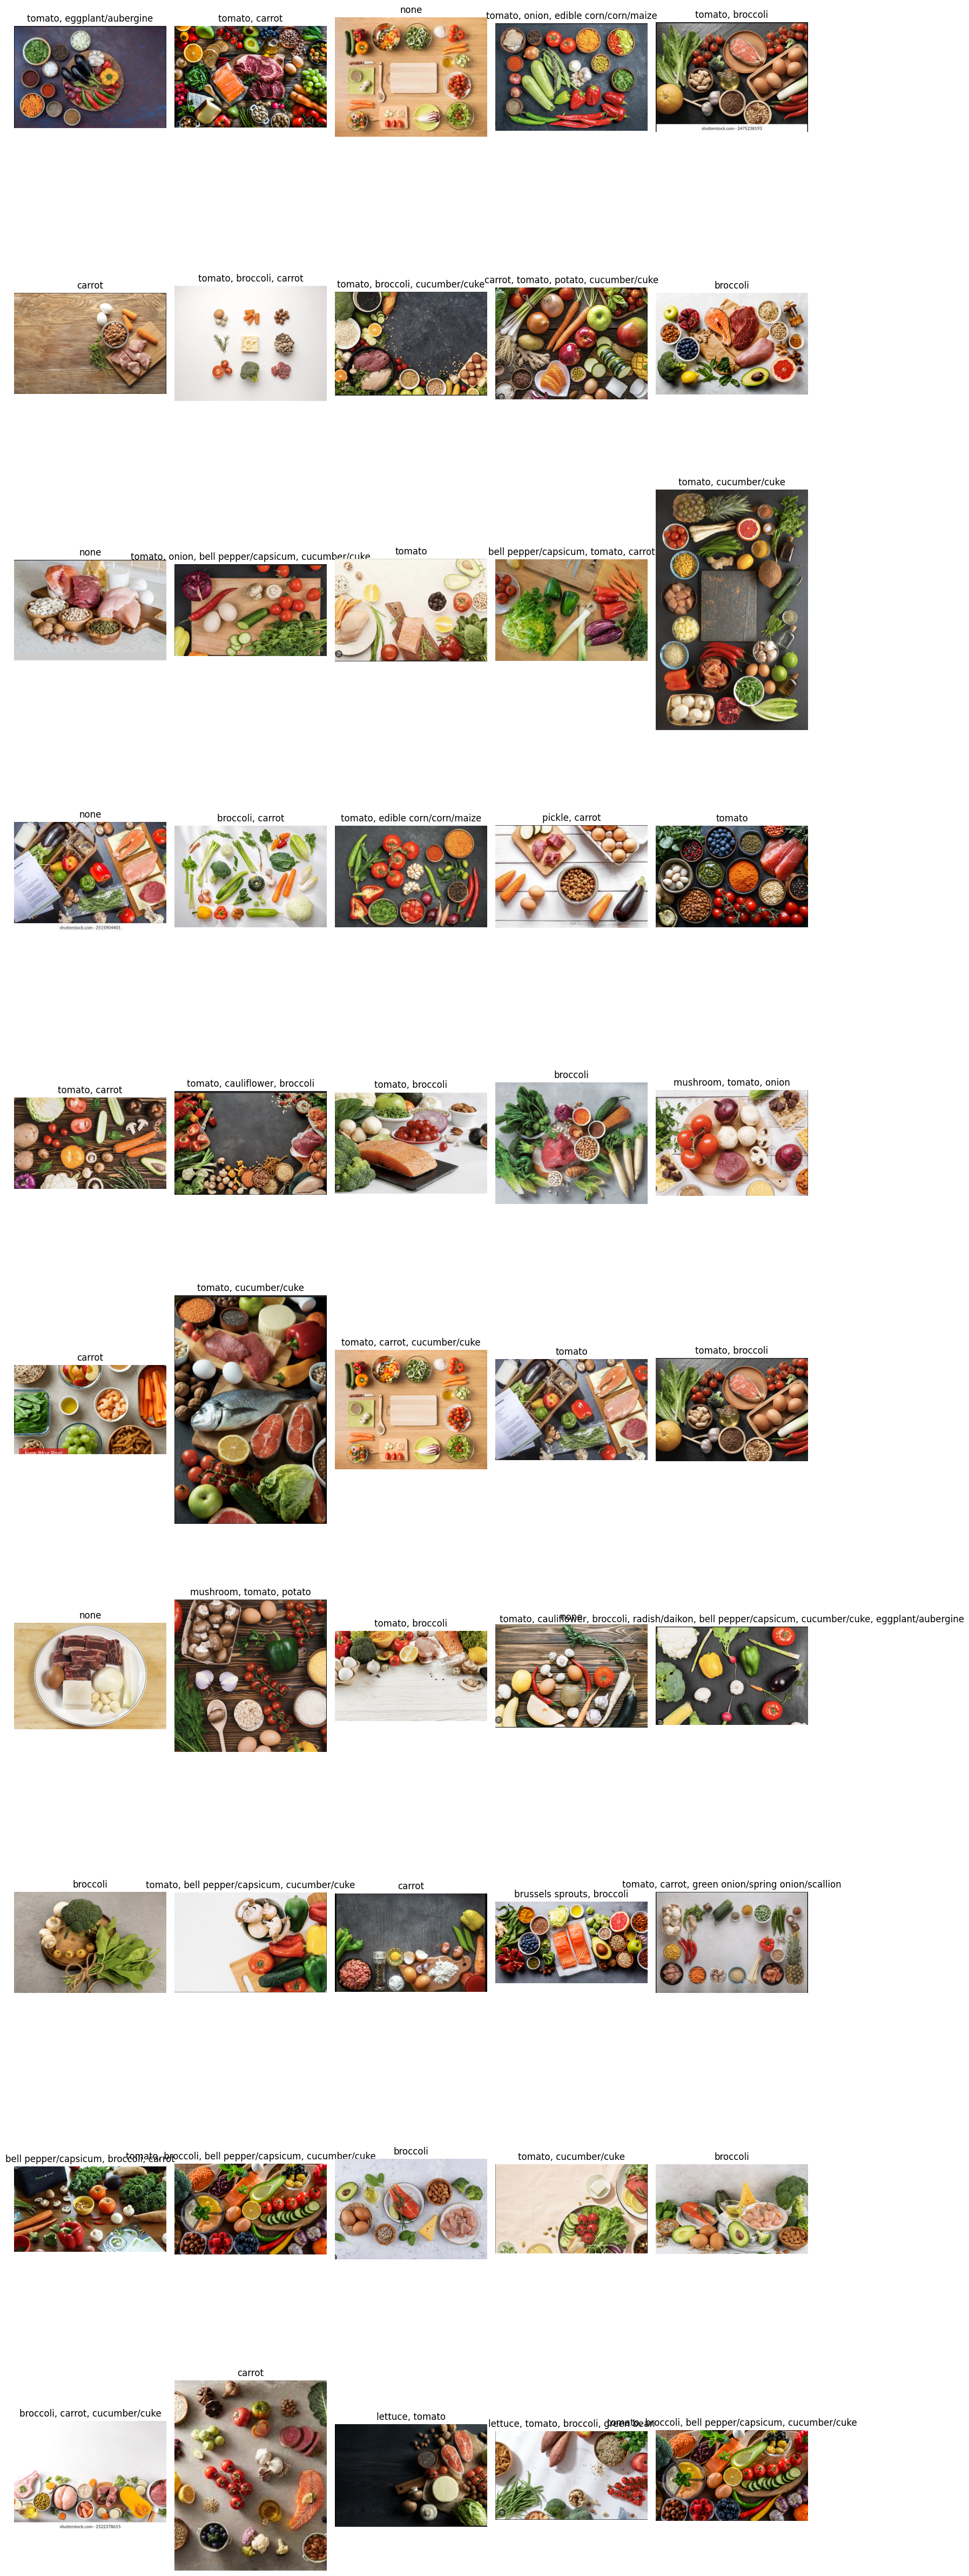

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

num_images = len(img_list)
cols = 5
rows = (num_images + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))

if rows == 1:
    axes = axes.reshape(1, -1)
elif cols == 1:
    axes = axes.reshape(-1, 1)

for i in range(len(img_list)):
    path = os.path.join(img_dir, img_list[i])
    
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGRA)
    
    # subplot 위치 계산
    row = i // cols
    col = i % cols
    
    # 이미지 표시
    axes[row, col].imshow(img_rgb)
    axes[row, col].set_title(f'{", ".join(results_classes[i]) if results_classes[i] else "none"}')
    axes[row, col].axis('off')

for i in range(num_images, rows * cols):
    row = i // cols
    col = i % cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [6]:
from ultralytics import YOLO
import os

# 테스트 이므로 img_dir받음 실제로는 이미지를 받을 예정 
def predict_ingredients(img_dir) -> list:
    IMG_LIST = os.listdir(img_dir)

    model = YOLO('./best.pt')

    results_classes = []
    for img in IMG_LIST:
        path = os.path.join(img_dir, img)

        results = model.predict(
            source=path,
            imgsz=640,
            conf=0.7
        )

        detected_classes = []
        for result in results:
            if result.boxes is not None:
                for box in result.boxes:
                    class_name = model.names[int(box.cls)]
                    detected_classes.append(class_name)


            unique_classes = list(set(detected_classes))
            results_classes.append(unique_classes)

    return results_classes        


In [7]:
path = '/home/sungjin/capstone/test_img2'

result = predict_ingredients(path)
result


image 1/1 /home/sungjin/capstone/test_img2/15.png: 448x640 1 Carrot, 1 bell pepper, 1 chili, 1 egg plant, 23.3ms
Speed: 1.3ms preprocess, 23.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/sungjin/capstone/test_img2/5.png: 448x640 1 Carrot, 2 Porks, 2 eggs, 22.7ms
Speed: 1.4ms preprocess, 22.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/sungjin/capstone/test_img2/4.jpeg: 512x640 2 Carrots, 3 Cucumbers, 24.9ms
Speed: 1.3ms preprocess, 24.9ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /home/sungjin/capstone/test_img2/26.png: 480x640 1 Carrot, 3 Paprikas, 1 chili, 23.7ms
Speed: 1.5ms preprocess, 23.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/sungjin/capstone/test_img2/18.png: 480x640 1 chili, 4 eggs, 23.2ms
Speed: 1.3ms preprocess, 23.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/sungjin/capstone/t

image 1/1 /home/sungjin/capstone/test_img2/16.png: 384x640 1 Carrot, 18.4ms
Speed: 1.5ms preprocess, 18.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/sungjin/capstone/test_img2/29.png: 640x448 1 Cabbage, 1 Pork, 2 eggs, 19.7ms
Speed: 1.3ms preprocess, 19.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /home/sungjin/capstone/test_img2/31.jpg: 512x640 2 Carrots, 2 Cucumbers, 1 bell pepper, 23.2ms
Speed: 1.5ms preprocess, 23.2ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /home/sungjin/capstone/test_img2/19.png: 448x640 1 Beef, 1 Button mushroom, 1 Chicken meat, 1 bell pepper, 1 egg plant, 21.7ms
Speed: 1.5ms preprocess, 21.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/sungjin/capstone/test_img2/28.png: 448x640 1 chili, 4 eggs, 21.1ms
Speed: 1.2ms preprocess, 21.1ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/

[['bell pepper', 'chili', 'Carrot', 'egg plant'],
 ['egg', 'Carrot', 'Pork'],
 ['Cucumber', 'Carrot'],
 ['chili', 'Carrot', 'Paprika'],
 ['chili', 'egg'],
 ['egg', 'Carrot', 'Pork'],
 ['Carrot', 'oyster mushroom', 'Pork', 'egg', 'Broccoli'],
 [],
 ['egg', 'Cucumber', 'Potato', 'tofu'],
 ['Broccoli'],
 ['Pork', 'Chicken meat'],
 ['Button mushroom', 'Cucumber', 'egg', 'Paprika'],
 ['Paprika', 'Chicken meat'],
 ['Carrot', 'Paprika'],
 ['chili', 'Paprika', 'Button mushroom', 'Cucumber', 'egg', 'Chicken meat'],
 ['Beef', 'bell pepper', 'egg plant', 'Chicken meat'],
 ['Cabbage', 'bell pepper', 'Broccoli', 'Carrot'],
 ['chili', 'bell pepper'],
 ['Pork', 'Carrot', 'egg', 'egg plant'],
 ['Garlic'],
 ['Cabbage'],
 [],
 ['Button mushroom', 'Broccoli'],
 ['Carrot', 'Garlic', 'Pork', 'Cucumber', 'Broccoli'],
 ['Button mushroom', 'Pork'],
 ['Carrot'],
 ['Cabbage', 'Pork', 'egg'],
 ['Carrot', 'bell pepper', 'Cucumber'],
 ['egg plant', 'Beef', 'Button mushroom', 'bell pepper', 'Chicken meat'],
 ['chil